# K-Means Clustering 

### notebook imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set()

### loading the data

In [5]:
data = pd.read_csv('3.01.+Country+clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [7]:
data.isnull().sum() # no missing values

Country      0
Latitude     0
Longitude    0
Language     0
dtype: int64

### plotting the data

[]

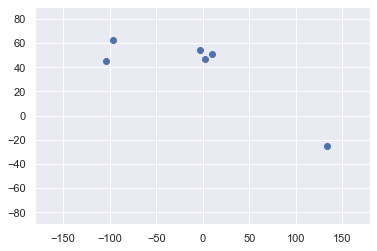

In [12]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.plot()

In [13]:
# selecting the latitude and longitude from the features

In [17]:
x = data.iloc[:,1:3] # slicing the 2nd and 3rd columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [18]:
### K means clustering

In [30]:
kmeans = KMeans(6)

In [31]:
kmeans.fit(x)

KMeans(n_clusters=6)

In [32]:
### since we want cluster

identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([0, 3, 4, 5, 1, 2], dtype=int32)

In [33]:
data_with_cluster = data
data_with_cluster['cluster']= identified_cluster
data_with_cluster.head()

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,3
2,France,46.75,2.40,French,4
3,UK,54.01,-2.53,English,5
4,Germany,51.15,10.40,German,1


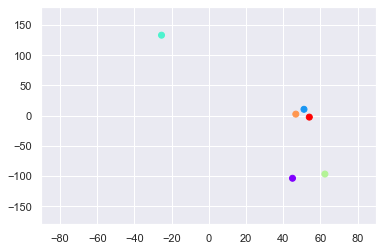

In [34]:
## plotting the cluster

plt.scatter(data_with_cluster['Latitude'], data_with_cluster['Longitude'],c=data_with_cluster['cluster'], cmap='rainbow')
plt.xlim(-90,90)
plt.ylim(-180,180)
plt.show()

### Clustering categorical data

In [35]:
data_cat = data
data_cat

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,3
2,France,46.75,2.40,French,4
3,UK,54.01,-2.53,English,5
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


In [36]:
data_cat['Language'] = data_cat['Language'].map({'English':0,'French':1,'German':2})

In [38]:
### using language to perform k means clustering

In [41]:
lang = data_cat.iloc[:,3:4]
lang


,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [49]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [50]:
clustered_data = kmeans.fit_predict(lang)

In [51]:
data_cat['language_cluster']= clustered_data

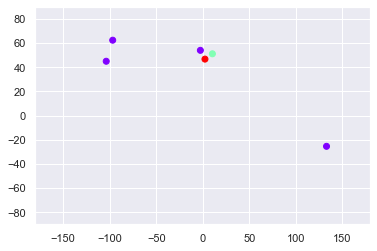

In [52]:
## plotting the data according to language

plt.scatter(data_cat['Longitude'],data_cat['Latitude'], c=data_cat['language_cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#### Example working with categorical data

In [56]:
cat_data = pd.read_csv('Categorical.csv')
cat_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [55]:
cat_data['continent'].value_counts()

Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: continent, dtype: int64

In [57]:
mapped_data = cat_data

In [58]:
mapped_data['continent']= mapped_data['continent'].map({'Africa':1,
                                                       'Asia':2,
                                                       'Europe':3,
                                                       'North America':4,
                                                       'Oceania':5,
                                                       'South America':6,
                                                       'Seven seas (open ocean)':7,
                                                       'Antarctica':8})

In [61]:
mapped_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


In [65]:
x = mapped_data.iloc[:,2:4]

In [66]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans()

In [67]:
kmeans.fit_predict(x)

array([2, 6, 7, 2, 0, 3, 0, 6, 1, 0, 7, 4, 7, 4, 2, 1, 0, 0, 5, 0, 5, 2,
       6, 0, 6, 3, 6, 0, 2, 3, 2, 6, 7, 7, 2, 5, 6, 1, 5, 0, 1, 6, 5, 5,
       5, 5, 1, 5, 7, 2, 5, 2, 2, 2, 6, 6, 0, 0, 2, 2, 3, 2, 6, 5, 6, 2,
       0, 3, 5, 3, 7, 4, 0, 3, 5, 5, 3, 0, 0, 5, 2, 2, 2, 5, 0, 2, 3, 2,
       2, 5, 2, 4, 2, 0, 2, 0, 5, 3, 2, 7, 7, 3, 6, 6, 3, 6, 0, 2, 0, 6,
       0, 6, 0, 5, 0, 2, 5, 2, 6, 0, 6, 2, 6, 5, 6, 2, 0, 5, 1, 3, 0, 3,
       2, 2, 6, 0, 0, 1, 5, 6, 5, 0, 2, 6, 2, 0, 0, 2, 7, 2, 2, 1, 7, 5,
       1, 1, 2, 1, 5, 2, 1, 3, 3, 6, 5, 4, 2, 6, 5, 1, 7, 2, 5, 7, 3, 2,
       0, 0, 1, 6, 7, 6, 0, 3, 5, 6, 6, 2, 5, 2, 5, 4, 7, 7, 5, 2, 0, 5,
       5, 0, 0, 5, 5, 0, 0, 3, 1, 2, 7, 6, 2, 2, 5, 2, 0, 0, 7, 1, 2, 6,
       0, 6, 7, 5, 0, 1, 0, 0, 0, 2, 5, 2, 2, 2, 7, 7, 7, 2, 1, 7, 1],
      dtype=int32)

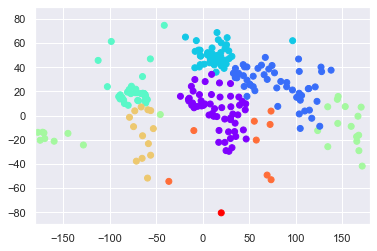

In [68]:
plt.scatter(mapped_data['Longitude'],mapped_data['Latitude'],c=mapped_data['continent'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Choosing the optimum number of cluster using the Elbow Method

In [69]:
# we can calculate the within cluster sum of squares (wcss) using the intertia_ from kmeans

In [70]:
kmeans.inertia_

5394.043886450495

In [71]:
## we choose the value of k for which the wcss is decreasing rapidly

In [72]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_value = kmeans.inertia_
    wcss.append(wcss_value)

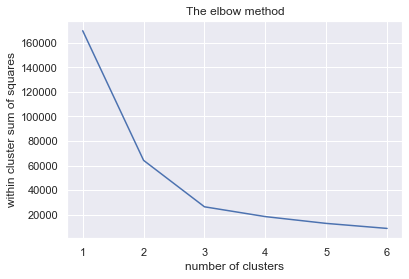

In [76]:
plt.title('The elbow method')
plt.plot([1,2,3,4,5,6],wcss)
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of squares')
plt.show()